# Nuages de mots

## Imports et stopwords

In [58]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gatho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "rue", "villa","louer",
       "maison","fr","app","ch","vendre","prix","bel","av","jard","Libre","jardin","vue",
       "téléphone","centre","terrain", "israël", "palestine", "jérusalem", "arabe", "arabes", "israëlo-arabe", "palestiniens", "israéliens", "juif", "juifs", "musulman", "moyen-orient", "nakba"]

sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [72]:
# Choisir une année
year = 1948

In [73]:
# Lister les fichiers de cette année
data_path = '../data/'
txt_path = '../data/txt_clean/'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

427

In [74]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [75]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"LA GUERRE EN PALESTINE Le Conseil de Sécurité a décidé le « Cessez le feu » Washington, 22.\n\n— Les divergences entre les Etats-Unis et l'Angleterre au sujet de la Palestine se font' nettement jour.\n\nE"

In [76]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [77]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"LA GUERRE EN PALESTINE Le Conseil de Sécurité a décidé le « Cessez le feu » Washington, 22.\n\n— Les divergences entre les Etats-Unis et l'Angleterre au sujet de la Palestine se font' nettement jour.\n\nET LA FRANCE, On annonce, en effet, qu'un dé- LA GRANDE-BRETAGNE ET D'AUTRES, DONT LA BELGIQUE, puté va déposer sur le bureau de Divergences entre Londres et Washington au sujet des problèmes du Moyen-Orient ESTIMENT QU'IL N'Y A PAS DE RUPTURE A LA PAIX EN PALESTINE Lake-Success, 23 (A.F.P.).\n\n— Les "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [78]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [79]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1948_clean.txt!'

In [80]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'GUERRE CONSEIL SÉCURITÉ DÉCIDÉ CESSEZ FEU WASHINGTON DIVERGENCES ETATS UNIS ANGLETERRE SUJET FONT NETTEMENT JOUR FRANCE ANNONCE EFFET GRANDE BRETAGNE BELGIQUE PUTÉ DÉPOSER BUREAU DIVERGENCES LONDRES WASHINGTON SUJET PROBLÈMES MOYEN ORIENT ESTIMENT RUPTURE PAIX LAKE SUCCESS ETATS UNIS FRANCE UKRAINE COLOMBIE OHT VOTÉ FAVEUR PARAGRAPHE RÉSOLUTION AMÉRICAINE CONSTATANT EXISTENCE MENACE PAIX RUPTURE PAIX DÉJÀ VENDREDI SÉNATEUR STYLES BRIDGES PRÉSIDENT COMMISSION CRÉDITS SÉNAT DÉCLARÉ COMMISSION DIRI'

## Nuage de mots

### Afficher les termes les plus fréquents


In [81]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('ETAT', 840), ('GOUVERNEMENT', 547), ('CONSEIL', 515), ('SÉCURITÉ', 388), ('COMTE', 375), ('BERNADOTTE', 364), ('ETATS', 363), ('TRÊVE', 356), ('DÉCLARÉ', 303), ('TEL', 293)]


### Créer, stocker et afficher le nuage de mots

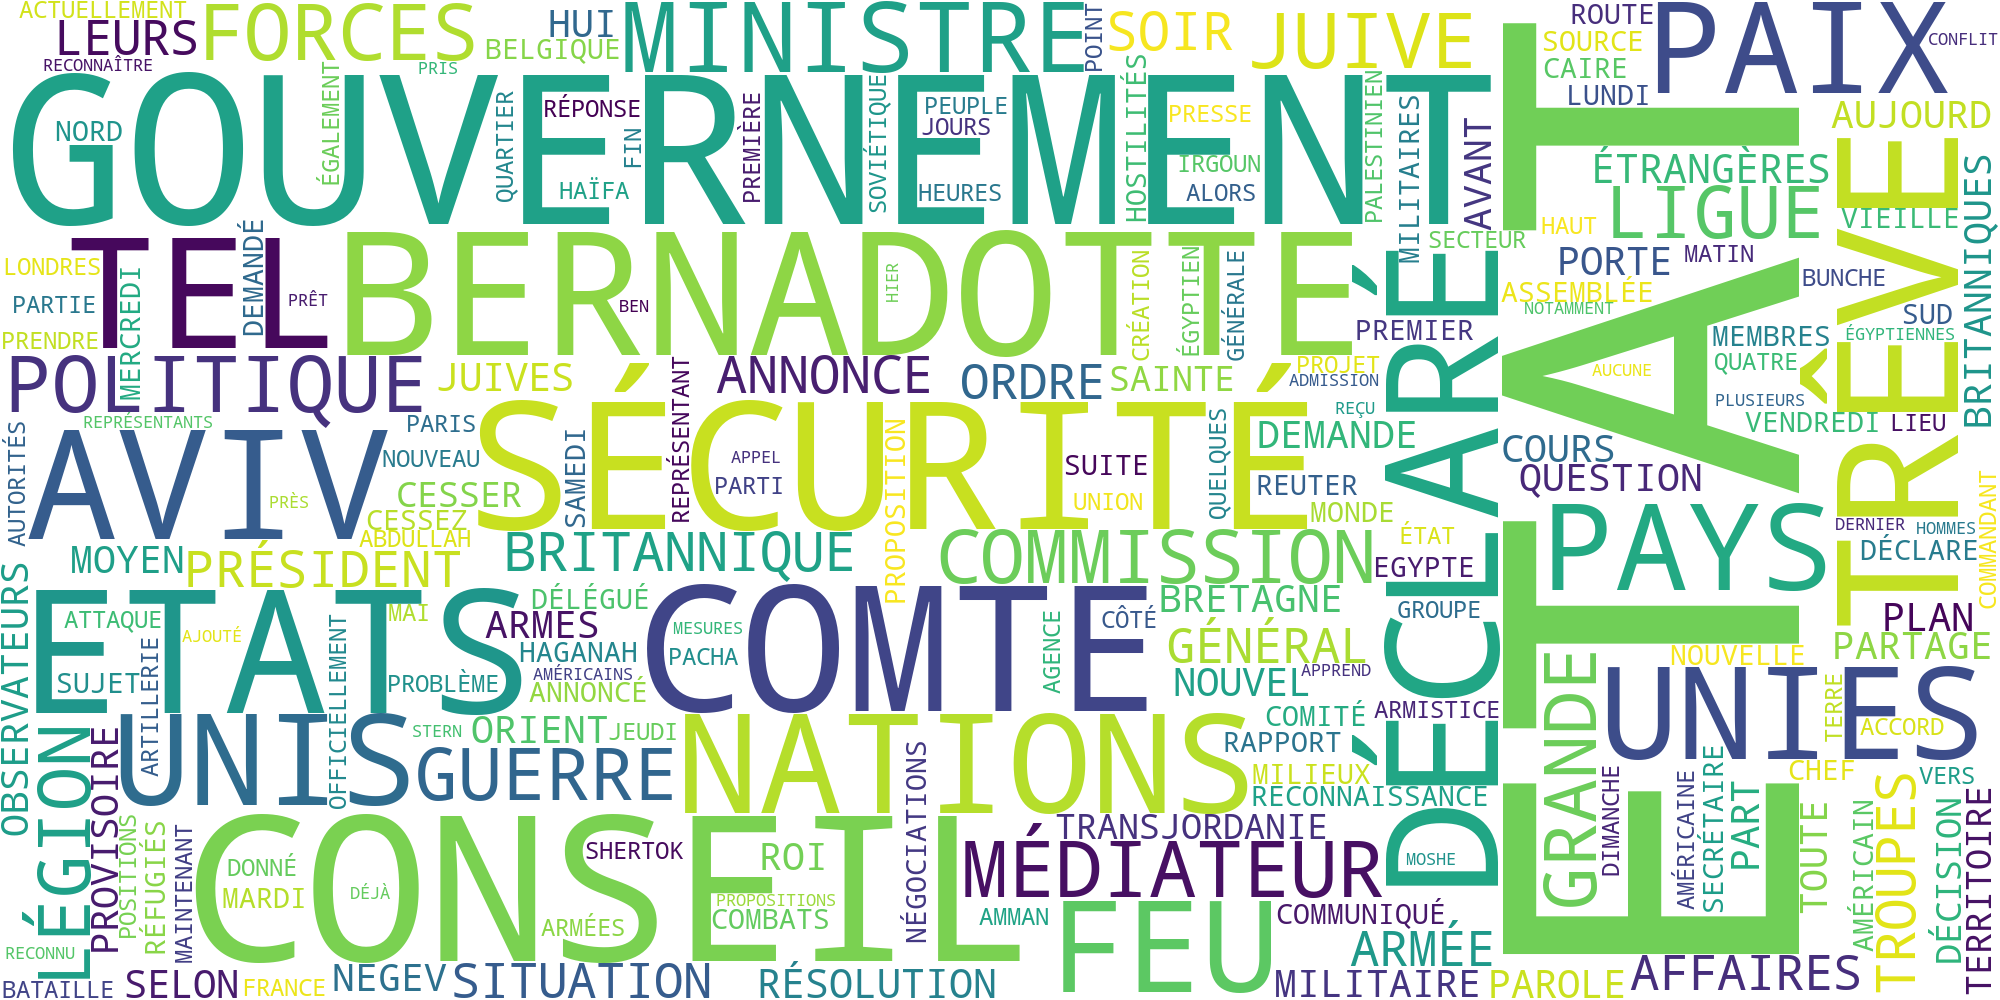

In [82]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}bis.png"))
Image(filename=os.path.join(temp_path, f"{year}bis.png"))